In [1]:
from qiskit_optimization.problems import QuadraticProgram
# from qiskit_optimization.converters import from_pandas_dataframe
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver

import pandas as pd

# # Load the data into a pandas dataframe
# data = pd.read_csv('data.csv')

# # Create a quadratic program from the data
# qp = QuadraticProgram()
# qp.from_dataframe(data)

# # Convert the quadratic program to an Ising Hamiltonian
# # op, offset = from_quadratic_program(qp)

# # Solve the problem using NumPyMinimumEigensolver
# solver = NumPyMinimumEigensolver()
# # result = solver.compute_minimum_eigenvalue(op)

# # Get the solution and print it
# # x = result.eigenstate.to_matrix()[0]
# # print(x)


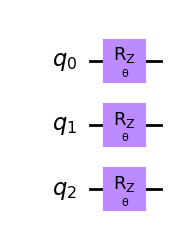

In [2]:
# Here we are importing all packages from qiskit
from qiskit import *
from qiskit.circuit import Parameter
from math import pi

# define the number of qubits
num_q = 3
theta = Parameter('θ')
# Here create the quantum circuit
qc = QuantumCircuit(num_q)

# Here we apply the Rz gate to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)


qc.draw(output='mpl')

In [3]:
import pandas as pd

df = pd.read_csv('Food Waste data and research - by country.csv')
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [4]:
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

In [5]:
df.dropna()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [6]:
df.drop('Source', axis=1, inplace=True)

In [7]:
df.drop('Region', axis=1, inplace=True)

In [8]:
df.drop('Confidence in estimate', axis=1, inplace=True)

In [9]:
df.drop('Country', axis=1, inplace=True)

In [10]:
df.head()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
0,126,82,3109153,16,594982,28,1051783,4
1,127,83,238492,16,45058,28,79651,8
2,135,91,3918529,16,673360,28,1190335,12
3,123,84,6497,13,988,26,1971,20
4,144,100,3169523,16,497755,28,879908,24


In [11]:
df.to_csv("food_waste_stuff.csv", index=False)

In [12]:
y = df

In [13]:
import pandas as pd
import seaborn as sns

df["class"] = pd.Series(labels)

sns.pairplot(df, hue="class", palette="tab10")

NameError: name 'labels' is not defined

In [ ]:
print(x.shape)

AttributeError: 'NoneType' object has no attribute 'shape'